In [8]:
!ls ../input/washingtondb-v1.0

README.txt  data  ground_truth	sets


In [5]:
import os
import re
import pandas as pd
from glob import glob
import cv2
from tqdm import tqdm

In [6]:
ROOT = f'../input/washingtondb-v1.0'

In [152]:
sets = 'cv1'

train_ids = [
    image_id.strip() for image_id in open(f'{ROOT}/sets/{sets}/train.txt').readlines()
]
valid_ids = [
    image_id.strip() for image_id in open(f'{ROOT}/sets/{sets}/valid.txt').readlines()
]
test_ids = [
    image_id.strip() for image_id in open(f'{ROOT}/sets/{sets}/test.txt').readlines()
]

len(train_ids), len(valid_ids), len(test_ids)

(325, 168, 163)

In [182]:
os.makedirs('prepared_datasets', exist_ok=True)
!rm -rf 'prepared_datasets/washington'
os.makedirs(f'prepared_datasets/washington', exist_ok=True)
os.makedirs(f'prepared_datasets/washington/images', exist_ok=True)

In [183]:
marking = []

lines = open(f'{ROOT}/ground_truth/transcription.txt').readlines()

for line in tqdm(lines):
    sample_id, text = line.split()
    text = (
        text
        .replace('-', '')
        .replace('|', ' ')
        .replace('s_pt', '.')
        .replace('s_cm', ',')
        .replace('s_mi', '-')
        .replace('s_bl', '(')
        .replace('s_br', ')')
        .replace('s_etc', 'etc')
        .replace('s_GW', 'G.W.')
        .replace('s_0', '0')
        .replace('s_1', '1')
        .replace('s_2', '2')
        .replace('s_3', '3')
        .replace('s_4', '4')    
        .replace('s_5', '5')
        .replace('s_6', '6')
        .replace('s_7', '7')
        .replace('s_8', '8')
        .replace('s_9', '9')
        .replace('s_s', 's')
        .replace('s_qt', "'")
        .replace('s_qo', ':')
        .replace('s_lb', '£')
        .strip()
    )
    
    if sample_id in train_ids:
        stage = 'train'
    elif sample_id in valid_ids:
        stage = 'valid'
    elif sample_id in test_ids:
        stage = 'test'
    else:
        stage = 'unknown'
    
    marking.append({
        'sample_id': sample_id,
        'path': f'washington/images/{sample_id}.png',
        'stage': stage,
        'text': text,
    })
    
#     !cp '../input/washingtondb-v1.0/data/line_images_normalized/{sample_id}.png' 'prepared_datasets/washington_{sets}/images/{sample_id}.png'
    
    
marking = pd.DataFrame(marking).set_index('sample_id')
marking['stage'].value_counts()

100%|██████████| 656/656 [00:00<00:00, 118787.01it/s]


train    325
valid    168
test     163
Name: stage, dtype: int64

In [184]:
!find "../input/washingtondb-v1.0/data/line_images_normalized/" -type f -name "*.png" -exec cp {} "prepared_datasets/washington/images/" \; 

sample_id: 278-19
text: £1000 which I wrote for to pay off the Troops,
image_shape: (120, 1447, 3)


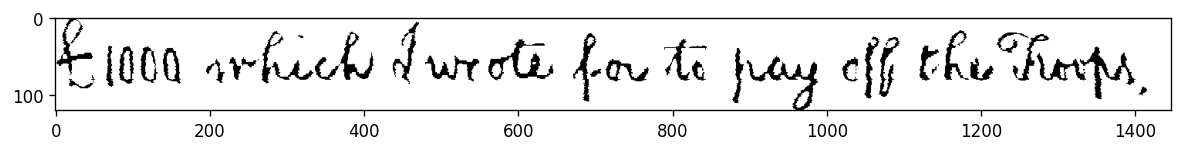

In [185]:
import matplotlib.pyplot as plt

idx = 278

sample = marking.iloc[idx]
text = sample['text']
image = cv2.imread(f'./prepared_datasets/{sample["path"]}')

print('sample_id:', sample.name)
print('text:', text)
print('image_shape:', image.shape)

plt.figure(num=None, figsize=(12, 3), dpi=120, facecolor='w', edgecolor='k')
plt.imshow(image);

In [193]:
chars = set()
for text in marking['text']:
    chars.update(text)
    
''.join(sorted(list(chars)))

" '(),-.0123456789:ABCDEFGHIJKLMNOPQRSTVWYabcdefghijklmnopqrstuvwxyz£"

In [186]:
for i, line in enumerate(lines):
    sample_id, text = line.split()
    text = (
        text
        .replace('-', '')
        .replace('|', ' ')
        .replace('s_pt', '.')
        .replace('s_cm', ',')
        .replace('s_mi', '-')
        .replace('s_bl', '(')
        .replace('s_br', ')')
        .replace('s_etc', 'etc')
        .replace('s_GW', 'G.W.')
        .replace('s_0', '0')
        .replace('s_1', '1')
        .replace('s_2', '2')
        .replace('s_3', '3')
        .replace('s_4', '4')    
        .replace('s_5', '5')
        .replace('s_6', '6')
        .replace('s_7', '7')
        .replace('s_8', '8')
        .replace('s_9', '9')
        .replace('s_s', 's')
        .replace('s_qt', "'")
        .replace('s_qo', ':')
        .replace('s_lb', '£')
        .strip()
    )
    if 's_' in text:
        print(i, text, line)

In [187]:
marking.to_csv('./prepared_datasets/washington/marking.csv')

In [188]:
!cd ./prepared_datasets && ls washington

images	marking.csv


In [189]:
!cd ./prepared_datasets && tar -czvf washington.tar.gz washington > /dev/null

In [190]:
!du -sh ./prepared_datasets/washington.tar.gz

1.8M	./prepared_datasets/washington.tar.gz
